In [17]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [18]:
# Load Dataset

df = pd.read_csv("diabetes_prediction_dataset.csv")

print("Dataset loaded successfully!")
print("Shape (rows, columns):", df.shape)
print("Column names:")
print(df.columns)

Dataset loaded successfully!
Shape (rows, columns): (100000, 9)
Column names:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [19]:
# View first 5 rows

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
# Data Cleaning

print("Initial dataset shape:", df.shape)

# Remove duplicate rows
df = df.drop_duplicates()

print("Dataset shape after removing duplicates:", df.shape)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

print("\nTotal missing values:", missing_values.sum())

# Statistical summary
df.describe()

Initial dataset shape: (100000, 9)
Dataset shape after removing duplicates: (96146, 9)

Data Types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Total missing values: 0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [21]:
# Encode Categorical Variables

label_encoders = {}

categorical_columns = ["gender", "smoking_history"]

for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

        print(f"\nEncoding for {col}:")
        for i, label in enumerate(le.classes_):
            print(f"  {label} → {i}")

joblib.dump(label_encoders, "label_encoders.pkl")

print("\nCategorical encoding completed and saved.")


Encoding for gender:
  Female → 0
  Male → 1
  Other → 2

Encoding for smoking_history:
  No Info → 0
  current → 1
  ever → 2
  former → 3
  never → 4
  not current → 5

Categorical encoding completed and saved.


In [22]:
# Feature–Target Seperation

X = df.drop("diabetes", axis=1)
y = df["diabetes"]

print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

print("\nFeature names:")
for i, col in enumerate(X.columns, 1):
    print(f"{i}. {col}")

print("\nTarget variable: diabetes")

Feature matrix shape (X): (96146, 8)
Target vector shape (y): (96146,)

Feature names:
1. gender
2. age
3. hypertension
4. heart_disease
5. smoking_history
6. bmi
7. HbA1c_level
8. blood_glucose_level

Target variable: diabetes


In [23]:
# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed.")
print("Scaled feature matrix shape:", X_scaled.shape)

Feature scaling completed.
Scaled feature matrix shape: (96146, 8)


In [24]:
# Apply SMOTE

print("Class distribution BEFORE SMOTE:")
print("No Diabetes (0):", sum(y == 0))
print("Diabetes (1):", sum(y == 1))

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("\nClass distribution AFTER SMOTE:")
print("No Diabetes (0):", sum(y_balanced == 0))
print("Diabetes (1):", sum(y_balanced == 1))

Class distribution BEFORE SMOTE:
No Diabetes (0): 87664
Diabetes (1): 8482

Class distribution AFTER SMOTE:
No Diabetes (0): 87664
Diabetes (1): 87664


In [25]:
# Train–test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

print("Training set size:", X_train.shape)
print("Testing set size :", X_test.shape)

Training set size: (140262, 8)
Testing set size : (35066, 8)


In [26]:
# Model Training

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

print("All models trained successfully!")

All models trained successfully!


In [27]:
# Model Evaluation

import matplotlib.pyplot as plt
import seaborn as sns

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Predictions": y_pred
    }

    print(f"\n{name} Metrics:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    print(f"  ROC-AUC  : {roc_auc:.4f}")


Logistic Regression Metrics:
  Accuracy : 0.8831
  Precision: 0.8848
  Recall   : 0.8809
  F1-Score : 0.8829
  ROC-AUC  : 0.9618

Random Forest Metrics:
  Accuracy : 0.9240
  Precision: 0.9123
  Recall   : 0.9382
  F1-Score : 0.9251
  ROC-AUC  : 0.9837

XGBoost Metrics:
  Accuracy : 0.9686
  Precision: 0.9867
  Recall   : 0.9500
  F1-Score : 0.9680
  ROC-AUC  : 0.9961


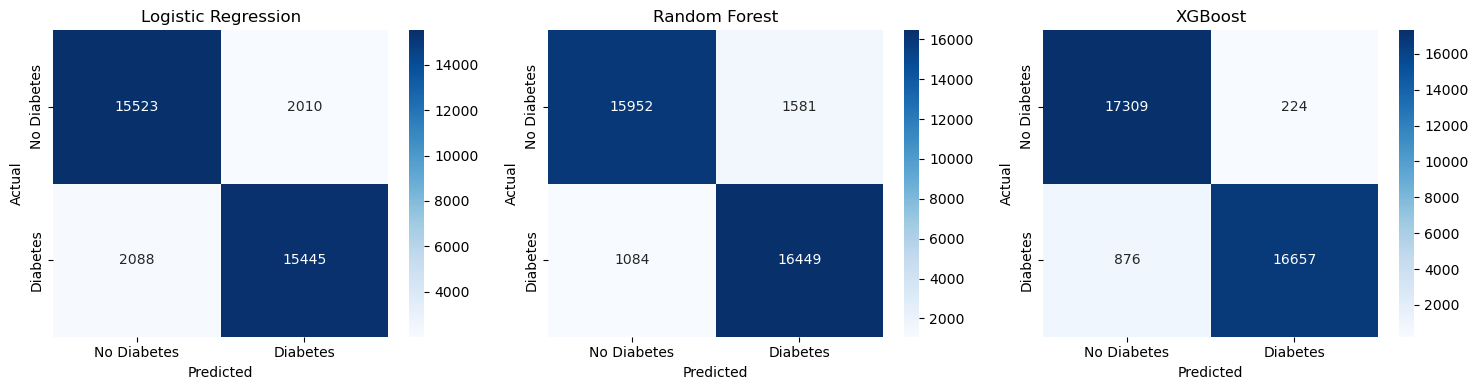

In [28]:
# Plot Confusion Matrices

fig, axes = plt.subplots(1, len(models), figsize=(15, 4))

for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res["Predictions"])
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Diabetes", "Diabetes"],
        yticklabels=["No Diabetes", "Diabetes"],
        ax=ax
    )
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=300)
plt.show()